## 오토인코더
- 비지도 unsupervised 방식으로 훈련된 인공 신경망
- 입력을 출력으로 복사하는 신경망으로 은닉층 또는 병목층
- 입력과 출력이 동일한 이미지
- __노이즈 제거에 주로 사용__
- 출력층엔 __sigmoid__ 함수 사용

- 인코더 : 가장 중요한 특징만 추출(손실 압축)
- 은닉층(병목층) : 모델의 뉴런 개수가 최소인 계층
- 디코더 : 압축된 데이터를 원래대로 재구성 역할

### 표현학습 Feature Learning : 특징 탐지 또는 분류에 필요한 표현을 자동으로 추출할 수 있도록 학습하는 과정

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
# 모델 도식화 가능
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import Sequential
from keras.utils import plot_model
from keras.utils import set_random_seed
from keras.datasets.mnist import load_data

In [111]:
(train_x, _), (test_x, _) = load_data()

In [112]:
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x_flatten = train_x.reshape(train_x.shape[0], -1)
test_x_flatten = test_x.reshape(test_x.shape[0], -1)

In [114]:
print(train_x_flatten.shape, test_x_flatten.shape)

(60000, 784) (10000, 784)


### 노이즈 추가

In [132]:
train_x_noised = train_x_flatten + np.random.normal(0, 0.5, size=train_x_flatten.shape)
test_x_noised = test_x_flatten + np.random.normal(0, 0.5, size=test_x_flatten.shape)

train_x_noised = np.clip(train_x_noised, a_min=0, a_max=1)
test_x_noised = np.clip(test_x_noised, a_min=0, a_max=1)

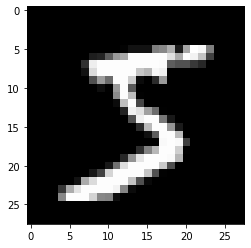

In [133]:
plt.imshow(train_x_flatten[0].reshape(28,28), cmap='gray')

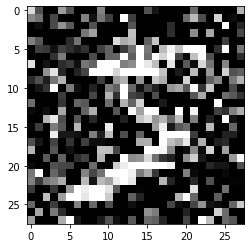

In [134]:
plt.imshow(train_x_noised[0].reshape(28,28), cmap='gray')

In [115]:
def createAuto(node):
    md = Sequential()
    md.add(Dense(units=node, activation='relu', input_shape=(784,)))
    md.add(Dense(784, activation='sigmoid'))
    md.compile(loss='mean_squared_error', optimizer='adam' )
    return md

In [117]:
md = createAuto(32)
md.fit(train_x_flatten, train_x_flatten, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0320
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0134
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0113
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0106
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0104
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0104
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0103
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0102
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102


In [118]:
md.evaluate(test_x_flatten, test_x_flatten)

313/313 [==============================] - 1s 2ms/step - loss: 0.0098


0.009845774620771408

In [128]:
pre_out = md.predict(test_x_flatten)

313/313 [==============================] - 0s 1ms/step


In [129]:
pre_out[0]

array([2.01051553e-05, 1.91437653e-06, 1.64025114e-05, 1.17388245e-05,
       5.14327212e-07, 3.40840052e-06, 2.67368227e-06, 9.76881438e-07,
       5.53909013e-06, 2.78849006e-06, 5.20134154e-06, 5.47887703e-06,
       5.04065110e-06, 7.66350865e-07, 2.58387286e-06, 1.34463414e-06,
       9.84888857e-07, 4.68897770e-06, 1.27032342e-06, 4.29359352e-06,
       7.58130057e-07, 1.73066655e-06, 2.18674063e-06, 1.69479722e-06,
       1.49458288e-06, 4.32737380e-07, 1.42036970e-06, 1.22927931e-05,
       4.56115686e-06, 9.30617989e-06, 1.33282094e-06, 3.68178621e-06,
       1.25728729e-05, 1.68854251e-06, 1.69200496e-06, 7.61713068e-07,
       8.25541065e-07, 1.60932359e-06, 4.41177008e-06, 1.03808929e-06,
       5.11889584e-06, 6.67736504e-06, 5.25525047e-06, 8.92718072e-06,
       7.47534978e-06, 3.33391313e-06, 1.13369492e-06, 6.93231004e-06,
       2.63864240e-06, 1.86759894e-06, 6.31417743e-06, 1.70877570e-06,
       5.55575241e-07, 1.06625998e-06, 7.59906413e-07, 1.88736772e-06,
      

In [119]:
pre_out = md.predict(test_x_flatten.reshape(-1,784)[0])

ValueError: in user code:

    File "c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\wng37\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_36" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


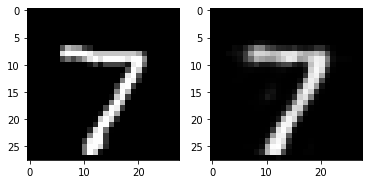

In [131]:
fig, axs = plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(test_x_flatten[0].reshape(28,28), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pre_out[0].reshape(28,28), cmap='gray')
plt.show()

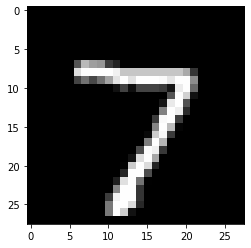

In [52]:
plt.imshow(test_x[0].reshape(28,28), cmap='gray')